### 1. Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import itertools
import statsmodels.api as sm

warnings.filterwarnings('ignore')
sns.set()

### 2. Load the Data

In [2]:
stock_raw_data = pd.read_csv(r"C:\zubeda\PGA02_Zubu\Machine Learning Models\TimeSeries\SBI_Historical_Data.csv")
stock_raw_data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Aug 07, 2020",190.65,191.45,192.10,189.55,44.82M,-0.16%
1,"Aug 06, 2020",190.95,192.30,194.50,190.25,59.74M,-0.26%
2,"Aug 05, 2020",191.45,192.75,196.85,191.00,68.89M,-0.08%
3,"Aug 04, 2020",191.60,193.35,193.80,190.50,43.87M,-0.34%
4,"Aug 03, 2020",192.25,192.00,194.60,190.05,72.46M,0.42%


### 3. Understand and Prepare the Data

**Q1) As part of EDA, perform the following tasks:**

**3.1 Dimensions of the Dataset**

In [3]:
#Checking structure of the data
stock_raw_data.shape

(1385, 7)

**3.2 Statistical Summary**

In [4]:
stock_raw_data.describe()

,Price,Open,High,Low
count,1385.000000,1385.000000,1385.000000,1385.000000
mean,266.274404,266.903213,270.343682,262.757906
std,45.555277,45.590664,45.829745,45.248334
min,150.850000,151.950000,153.200000,148.250000
25%,245.650000,245.900000,248.800000,242.550000
50%,270.800000,271.150000,274.600000,267.400000
75%,296.150000,296.500000,300.750000,292.200000
max,372.400000,371.950000,373.800000,366.200000


In [5]:
stock_raw_data.describe(include='object')

,Date,Vol.,Change %
count,1385,1385,1385
unique,1385,1147,638
top,"May 09, 2018",11.93M,-0.02%
freq,1,4,13


**3.3 Converting Date**

In [6]:
stock_raw_data.dtypes

Date         object
Price       float64
Open        float64
High        float64
Low         float64
Vol.         object
Change %     object
dtype: object

In [7]:
stock_data = stock_raw_data.copy(deep=True)
stock_data['Date'] = stock_data['Date'].apply(lambda x: pd.to_datetime(x))
stock_data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2020-08-07,190.65,191.45,192.10,189.55,44.82M,-0.16%
1,2020-08-06,190.95,192.30,194.50,190.25,59.74M,-0.26%
2,2020-08-05,191.45,192.75,196.85,191.00,68.89M,-0.08%
3,2020-08-04,191.60,193.35,193.80,190.50,43.87M,-0.34%
4,2020-08-03,192.25,192.00,194.60,190.05,72.46M,0.42%


In [8]:
stock_data.dtypes

Date        datetime64[ns]
Price              float64
Open               float64
High               float64
Low                float64
Vol.                object
Change %            object
dtype: object

**3.4 Checking Missing Values**

In [9]:
#summary of the data
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1385 non-null   datetime64[ns]
 1   Price     1385 non-null   float64       
 2   Open      1385 non-null   float64       
 3   High      1385 non-null   float64       
 4   Low       1385 non-null   float64       
 5   Vol.      1385 non-null   object        
 6   Change %  1385 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 75.9+ KB


Checking the stock time stamp

In [10]:
stock_data['Date'].min(), stock_data['Date'].max()

(Timestamp('2015-01-01 00:00:00'), Timestamp('2020-08-07 00:00:00'))

We remove the columns that we do not need

In [11]:
cols = ['Vol.', 'Open', 'High', 'Low', 'Change %']
stock_data_1 = stock_data.drop(cols, axis=1)
stock_data_1 = stock_data_1.sort_values('Date')

Checking for missing values

In [12]:
stock_data_1.isnull().sum()

Date     0
Price    0
dtype: int64

**3.5 Index the dataset with Date**

Aggregate price by date

In [13]:
stock_data_1 = stock_data_1.groupby('Date')['Price'].sum().reset_index()
stock_data_1

,Date,Price
0,2015-01-01,314.00
1,2015-01-02,315.25
2,2015-01-05,312.75
3,2015-01-06,299.90
4,2015-01-07,300.15
...,...,...
1380,2020-08-03,192.25
1381,2020-08-04,191.60
1382,2020-08-05,191.45
1383,2020-08-06,190.95


In [14]:
stock_data_1['Date'] = pd.to_datetime(stock_data_1['Date'])
stock_data_1.set_index('Date', inplace=True)
stock_data_1.index

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-05', '2015-01-06',
               '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-12',
               '2015-01-13', '2015-01-14',
               ...
               '2020-07-27', '2020-07-28', '2020-07-29', '2020-07-30',
               '2020-07-31', '2020-08-03', '2020-08-04', '2020-08-05',
               '2020-08-06', '2020-08-07'],
              dtype='datetime64[ns]', name='Date', length=1385, freq=None)

In [15]:
stock_data_1.head()

,Price
Date,
2015-01-01,314.00
2015-01-02,315.25
2015-01-05,312.75
2015-01-06,299.90
2015-01-07,300.15


### 4. Time Series Analysis

**4.1 Visualizing the Data**

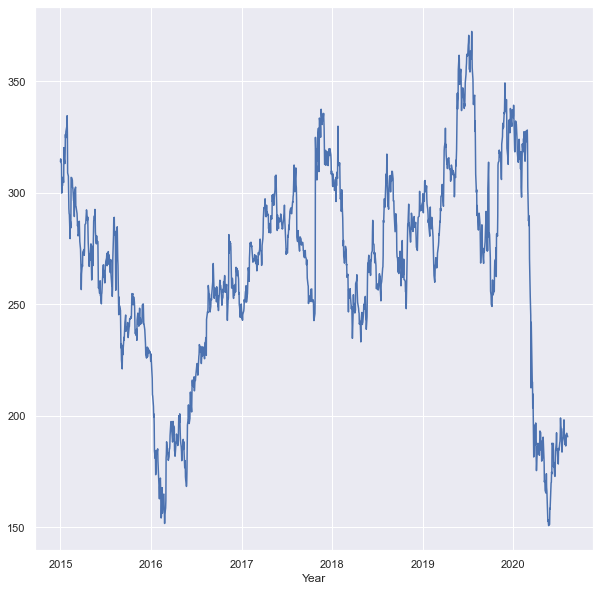

In [16]:
#Plot 6 years Data
fig = plt.figure(figsize=(10, 10))
plt.plot(stock_data_1)
plt.xlabel('Year')
plt.show()

**4.2 Sampling**

In [17]:
data = stock_data_1['Price'].resample('MS').mean()
data.head()

Date
2015-01-01    314.902381
2015-02-01    296.115000
2015-03-01    281.002381
2015-04-01    279.800000
2015-05-01    277.922500
Freq: MS, Name: Price, dtype: float64

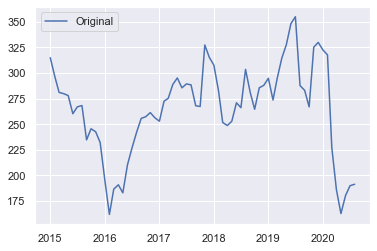

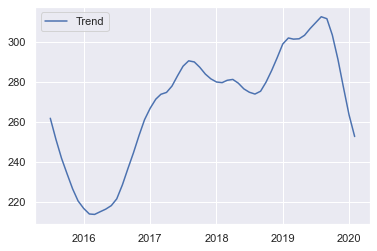

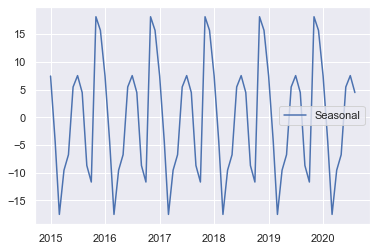

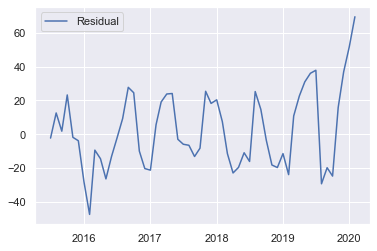

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data)

plt.plot(data, label='Original')
plt.legend(loc='best')

trend = decomposition.trend
plt.show()
plt.plot(trend, label='Trend')
plt.legend(loc='best')

seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')

residual = decomposition.resid
plt.show()
plt.plot(residual, label='Residual')
plt.legend(loc='best')

**4.3 Checking Stationarity**

**4.3.1 Augmented Dickey-Fuller(ADF) Test**

H0: Series is not stationary, 
H1: Series is stationary

In [19]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    #Perform Dickey-Fuller test
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput)

Test Statistic < Critical Value : Reject H0: Stationary, 
Test Statistic > Critical Value : Reject H1: Non-Stationary

In [20]:
#apply adf test on the series
adf_test(data)

Results of Dickey-Fuller Test:
Test Statistic            -2.460279
p-value                    0.125440
#Lags Used                 1.000000
Number of Observations    66.000000
Critical Value (1%)       -3.533560
Critical Value (5%)       -2.906444
Critical Value (10%)      -2.590724
dtype: float64


Since, Test Statistic > Critical Value Accept H0. Hence, the series is Non-Stationary.

**4.3.2 KPSS (Kwiatkowski-Phillips-Schimidth-Shin) Test**

H0: The process is trend stationary, H1: The series has a unit root (Non-Staionary)

In [21]:
#KPSS test is a statistical test to check for stationarity of a series around a deterministic trend.
#Like ADF test, the KPSS test is also commonly used to analyse the stationarity of a series.

#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c', nlags='legacy')
    #regression: str{“c”, “ct”}
    #The null hypothesis for the KPSS test.
    #“c” : The data is stationary around a constant (default).
    #“ct” : The data is stationary around a trend.
    #nlags: {str, int}, optional
    #Indicates the number of lags to be used
    #If set to “legacy”, uses int(12 * (n / 100)**(1 / 4))
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic', 'p-value', 'Lags Used'])
    for key, value in kpsstest[3].items():
        kpss_output['Critical Value (%s)' %key] = value
    print(kpss_output)

In [22]:
kpss_test(data)

Results of KPSS Test:
Test Statistic            0.141737
p-value                   0.100000
Lags Used                11.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


Since, Test Statistic < Critical Value Reject H0. Hence, the series is Non-Stationary.

**After performing these 2 test we can conclude that the series is Non-Stationary**

Differencing to Remove Seasonability

In [23]:
#Differencing is performed by subtracting previous observation from the current observation.
#Differencing can stabilize the mean of the time series by removing changes in the level of time series and so eliminating trends and seasonability.
data = data - data.shift(1)

#The shift() function is used to shift the index by desired no. of periods with an optional time freq.
#When freq is not passed, shift the index without realigning the data.

<AxesSubplot:xlabel='Date'>

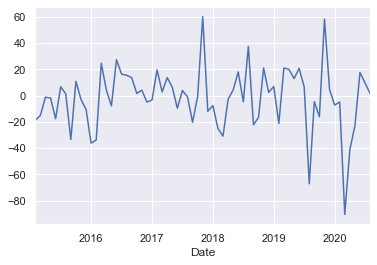

In [24]:
data.dropna(inplace=True)
data.plot()

**4.4 Decomposing**

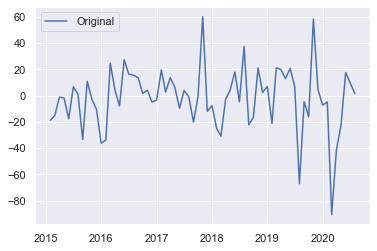

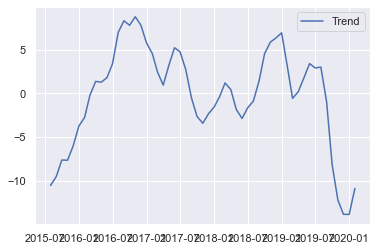

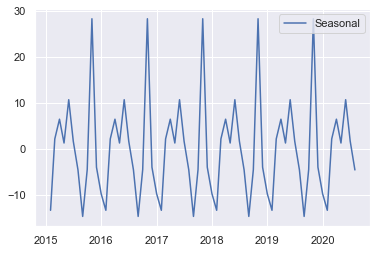

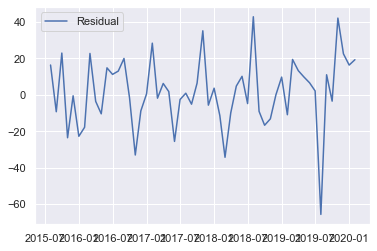

In [25]:
decomposition = seasonal_decompose(data)

plt.plot(data, label='Original')
plt.legend(loc='best')

trend = decomposition.trend
plt.show()
plt.plot(trend, label='Trend')
plt.legend(loc='best')

seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')

residual = decomposition.resid
plt.show()
plt.plot(residual, label='Residual')
plt.legend(loc='best')

### 5. Time Series Forecasting using ARIMA

p, d, q => Accounts of seasonality, trend and noise in the time series data.

In [26]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} X {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} X {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} X {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} X {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) X (0, 0, 1, 12)
SARIMAX: (0, 0, 1) X (0, 1, 0, 12)
SARIMAX: (0, 1, 0) X (0, 1, 1, 12)
SARIMAX: (0, 1, 0) X (1, 0, 0, 12)


Split the data into train and test sets

In [27]:
#Systematic splitting
size = int(len(data) * 0.95)
train, test = data[0:size], data[size:len(data)]

In [28]:
test.head()

Date
2020-05-01   -23.078070
2020-06-01    17.622010
2020-07-01     9.550988
2020-08-01     1.451739
Freq: MS, Name: Price, dtype: float64

**5.1 Parameter Selection**

In [29]:
from pylab import rcParams

order_list = []
param_seasonal_list = []
aic_list = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train, order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA {} x {} - AIC: {}'.format(param, param_seasonal, results.aic))
            order_list.append(param)
            param_seasonal_list.append(param_seasonal)
            aic_list.append(results.aic)
        except:
            continue

ARIMA (0, 0, 0) x (0, 0, 0, 12) - AIC: 573.0176020406128
ARIMA (0, 0, 0) x (0, 0, 1, 12) - AIC: 468.41710772870255
ARIMA (0, 0, 0) x (0, 1, 0, 12) - AIC: 496.6096221951665
ARIMA (0, 0, 0) x (0, 1, 1, 12) - AIC: 366.5131642928736
ARIMA (0, 0, 0) x (1, 0, 0, 12) - AIC: 477.6963736316133
ARIMA (0, 0, 0) x (1, 0, 1, 12) - AIC: 468.0579930448645
ARIMA (0, 0, 0) x (1, 1, 0, 12) - AIC: 369.7808848651431
ARIMA (0, 0, 0) x (1, 1, 1, 12) - AIC: 358.7216491387944
ARIMA (0, 0, 1) x (0, 0, 0, 12) - AIC: 565.355794684474
ARIMA (0, 0, 1) x (0, 0, 1, 12) - AIC: 460.32600113093685
ARIMA (0, 0, 1) x (0, 1, 0, 12) - AIC: 487.6081887077803
ARIMA (0, 0, 1) x (0, 1, 1, 12) - AIC: 360.57295689540933
ARIMA (0, 0, 1) x (1, 0, 0, 12) - AIC: 479.19090969700324
ARIMA (0, 0, 1) x (1, 0, 1, 12) - AIC: 460.83011729547815
ARIMA (0, 0, 1) x (1, 1, 0, 12) - AIC: 371.6546921162489
ARIMA (0, 0, 1) x (1, 1, 1, 12) - AIC: 352.15931033181226
ARIMA (0, 1, 0) x (0, 0, 0, 12) - AIC: 597.0631111621733
ARIMA (0, 1, 0) x (0, 0, 1

In [30]:
min_val = aic_list.index(min(aic_list))
print(min(aic_list))
order = order_list[min_val]
seasonal_order = param_seasonal_list[min_val]

348.22413602788436


**5.2 Fitting the ARIMA Model**

In [31]:
mod = sm.tsa.statespace.SARIMAX(train, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0815      0.221     -4.904      0.000      -1.514      -0.649
ar.S.L12      -0.8119      0.164     -4.950      0.000      -1.133      -0.490
ma.S.L12      -0.2666      0.370     -0.721      0.471      -0.992       0.458
sigma2       603.2456    245.865      2.454      0.014     121.358    1085.133


Running model diagnostics to check any unusual behaviour

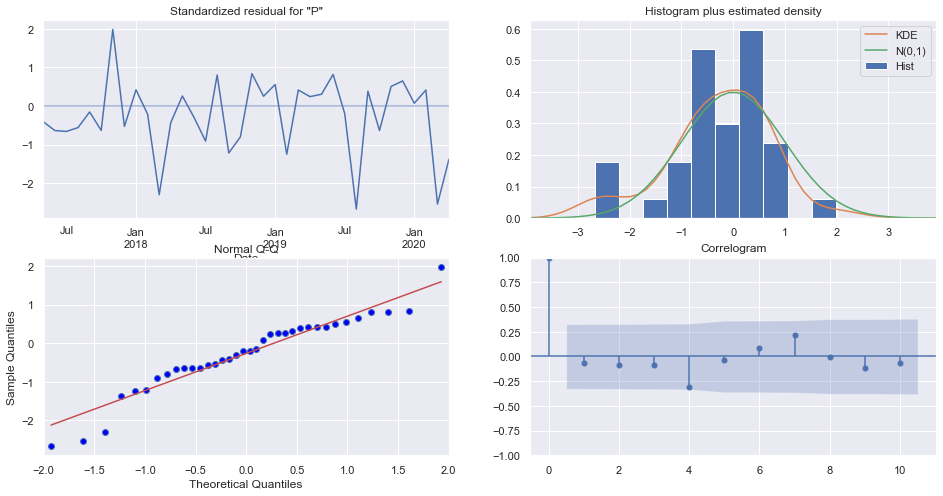

In [32]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

**From the above diagnostics plot, we can see the residuals are normally distributed**

**5.3 Validating Forecasts**

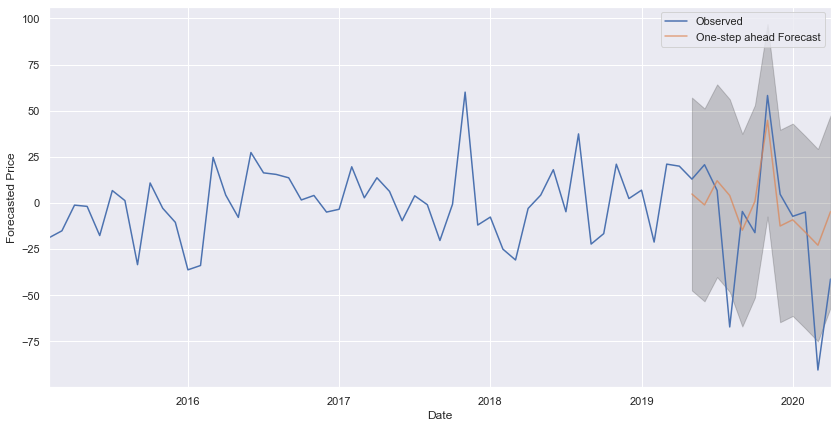

In [33]:
#set forecasts to start at 2019-05-01 to end of the data to forecast
pred = results.get_prediction(start=pd.to_datetime('2019-05-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = train['2015':].plot(label='Observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Forecasted Price')
plt.legend()
plt.show()

**5.4 Calculate MSE and RMSE**

In [34]:
y_forecasted = pred.predicted_mean
y_truth = train['2016-01-01':]
mse = ((y_forecasted- y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 1045.01
The Root Mean Squared Error of our forecasts is 32.33


**5.5 Visualizing the Forecast**

            lower Price  upper Price
2020-05-01   -55.671131    48.536301
2020-06-01   -47.007975    57.494544
2020-07-01   -61.539344    43.257432
2020-08-01   -23.654547    81.435663
2020-09-01   -80.681061    24.701765
2020-10-01   -71.374435    34.300196
2020-11-01   -34.741702    71.223931
2020-12-01   -61.351628    44.904210
2021-01-01   -56.321249    50.224018
2021-02-01   -81.335881    25.504243
2021-03-01   -42.571507    64.556446
2021-04-01   -41.224977    66.190035
2021-05-01   -48.825067    58.578035


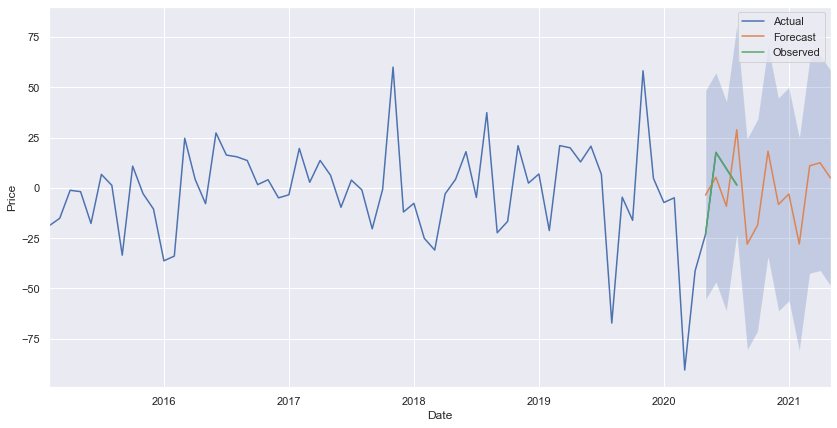

In [35]:
pred_uc = results.get_forecast(steps=13)
pred_ci = pred_uc.conf_int()
ax = data.plot(label='Actual', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
test.plot(label='Observed')
print(pred_ci)
plt.legend(loc='best')
plt.show()

**5.6 Comparing the predictions**

In [36]:
Result = pd.DataFrame()
Result['Actual'] = test
Result['Predicted'] = pred_ci['upper Price']
Result

,Actual,Predicted
Date,,
2020-05-01,-23.078070,48.536301
2020-06-01,17.622010,57.494544
2020-07-01,9.550988,43.257432
2020-08-01,1.451739,81.435663


In [37]:
mse = ((Result['Actual']- Result['Predicted']) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 3563.0
The Root Mean Squared Error of our forecasts is 59.69


### Conclusion

The stock price increases and decreases irrespective of the season. Stock price can also be analyzed using multivariate time series.